# Aquecimento para a formação em infraestrutura do Escritório de Dados 
## Autor: Carlos Henrique Santos da Silva
### email: caique.rj@gmail.com

# Etapa 1: Entendendo os dados 

Objetivo: nessa etapa, você deve somente ingerir dados da API do randomuser.me e observar o formato dos dados, tentando imaginar como eles poderiam ser usados para construir uma tabela.

Descrição da solução: a solução dessa etapa consiste em uma função para consumir a API na URL https://randomuser.me/api/ e retornar um dicionário com os dados.

Links úteis:
Documentação da API: https://randomuser.me/documentation
Introdução a ingestão de dados via API: https://www.dataquest.io/blog/python-api-tutorial/

In [3]:
# Importando bibliotecas
import requests
import json

# Definindo a quantidade de registros
nReg = 5

# Definindo os campos de retorno
sCampos = 'name,gender,dob,nat,location,phone,cell'

# Definindo a string da API
sAPI = 'https://randomuser.me/api/?results=' + str(nReg) + '&inc=' + sCampos + '&noinfo'

response = requests.get(sAPI)
#print(response)

# Retornando e imprimindo o dicionário
dicResponse = response.json()
print(dicResponse)

# Etapa 1 Concluída com sucesso

{'results': [{'gender': 'male', 'name': {'title': 'Mr', 'first': 'Raul', 'last': 'Clark'}, 'location': {'street': {'number': 3436, 'name': 'W Belt Line Rd'}, 'city': 'Bowral', 'state': 'Queensland', 'country': 'Australia', 'postcode': 8176, 'coordinates': {'latitude': '-83.9389', 'longitude': '-14.1929'}, 'timezone': {'offset': '+1:00', 'description': 'Brussels, Copenhagen, Madrid, Paris'}}, 'dob': {'date': '1956-09-21T08:36:35.357Z', 'age': 66}, 'phone': '00-8400-8819', 'cell': '0440-263-038', 'nat': 'AU'}, {'gender': 'female', 'name': {'title': 'Miss', 'first': 'Magret', 'last': 'Markert'}, 'location': {'street': {'number': 2480, 'name': 'Heideweg'}, 'city': 'Bad Schwartau', 'state': 'Thüringen', 'country': 'Germany', 'postcode': 27582, 'coordinates': {'latitude': '78.1777', 'longitude': '-7.6561'}, 'timezone': {'offset': '+1:00', 'description': 'Brussels, Copenhagen, Madrid, Paris'}}, 'dob': {'date': '1982-03-24T19:10:56.711Z', 'age': 40}, 'phone': '0522-1095505', 'cell': '0170-5649

# Etapa 2: Coletando dados 

Objetivo: nessa etapa, você deve coletar dados da API e armazená-los em um arquivo CSV.

Descrição da solução: a solução dessa etapa consiste em uma função para coletar uma quantidade n de dados da API (sendo n um valor fornecido via parâmetro da função), manipulá-los para montar um pandas.DataFrame e salvar o resultado em um arquivo CSV.

Links úteis:
Documentação da API: https://randomuser.me/documentation
Documentação do Pandas: https://pandas.pydata.org/docs/

Dicas:
Para tornar os dados mais fáceis de manipular no futuro, faça com que o DataFrame seja "plano", ou seja, cada coluna seja um único atributo do objeto.
Para ter dados suficientes para uma análise razoável nas próximas etapas, recomendamos n>=500.

In [4]:
# Importando bibliotecas
import requests
import json
import pandas as pd

# Criando a função pra pegar n registros da API
def GetApiRndUser(nreg = 10, inc = '', gender = '', nat = ''):
   
    # Montando os campos
    sCampos = 'name,gender,dob,location,phone,cell'
    sCamposExtras = inc
    if sCamposExtras != '':
        sCampos = sCampos + ',' + sCamposExtras

    # Definindo a string da API
    sAPI = 'https://randomuser.me/api/?results=' + str(nreg) + '&inc=' + sCampos + '&noinfo'
    if gender != '':
        sAPI = sAPI + '&gender=' + gender
        
    # Pegando os dados da API
    response = requests.get(sAPI)

    # Retornando o dicionário
    dicResponse = response.json()

    # Criando um DataFrame a partir do dicionário
    dfResult = pd.DataFrame.from_dict(dicResponse['results'])

    # Transformando o campo "Name" em colunas "flat"
    lstTitleName = [item['title'] for item in dfResult['name']]
    dfResult['title_name'] = lstTitleName
    lstFirstName = [item['first'] for item in dfResult['name']]
    dfResult['first_name'] = lstFirstName
    lstLastName = [item['last'] for item in dfResult['name']]  
    dfResult['last_name'] = lstLastName
    dfResult = dfResult.drop('name', axis=1)

    # Transformando o campo "location" em colunas "flat"
    lstCountryLocation = [item['country'] for item in dfResult['location']]
    dfResult['country_location'] = lstCountryLocation  
    lstStateLocation = [item['state'] for item in dfResult['location']]  
    dfResult['state_location'] = lstStateLocation       
    lstCityLocation = [item['city'] for item in dfResult['location']]
    dfResult['city_location'] = lstCityLocation   
    dfResult = dfResult.drop('location', axis=1)

    # Transformando o campo "DoB" em colunas "flat"
    lstDateDob = [item['date'] for item in dfResult['dob']]  
    dfResult['date_dob'] = lstDateDob    
    dfResult['date_dob'] = pd.to_datetime(dfResult.date_dob)
    dfResult['date_dob'] = dfResult['date_dob'].dt.strftime('%d/%m/%Y')
    lstAgeDob = [item['age'] for item in dfResult['dob']]
    dfResult['age_dob'] = lstAgeDob
    dfResult = dfResult.drop('dob', axis=1)
    
    # Arrumando as colunas do DataFrame
    lstColunas = ['title_name', 'first_name', 'last_name', 'gender', 'date_dob', 'age_dob', 'country_location', 'state_location', 'city_location', 'phone', 'cell']
    if sCamposExtras != '':
        lstColunasExtras = sCamposExtras.split(',')
        lstColunas.extend(lstColunasExtras)
    
    # Transformando Campos "flat" opcionais
        
    if 'registered' in sCamposExtras:
        lstDateReg = [item['date'] for item in dfResult['registered']]  
        dfResult['date_reg'] = lstDateReg
        dfResult['date_reg'] = pd.to_datetime(dfResult.date_reg)
        dfResult['date_reg'] = dfResult['date_reg'].dt.strftime('%d/%m/%Y')
        lstColunas.append('date_reg')

        lstAgeReg = [item['age'] for item in dfResult['registered']]
        dfResult['age_reg'] = lstAgeReg
        lstColunas.append('age_reg')
        
        lstColunas.remove('registered')
        dfResult = dfResult.drop('registered', axis=1)

    # Arrumando as colunas do DataFrame
    dfResult = dfResult[lstColunas]
    
    # Exportando o DataFrame para CSV
    dfResult.to_csv(r'Resultado.csv', sep=';')
    
    return dfResult
    
# Chamando a função criada para teste 
display(GetApiRndUser(10, gender='female', inc='nat'))

# Etapa 2 Concluída com sucesso

,title_name,first_name,last_name,gender,date_dob,age_dob,country_location,state_location,city_location,phone,cell,nat
0,Mrs,Ceyhan,Pektemek,female,27/09/1944,78,Turkey,Kastamonu,Isparta,(773)-761-0929,(746)-519-1992,TR
1,Ms,Lívian,Caldeira,female,24/09/1950,72,Brazil,Sergipe,Franco da Rocha,(11) 8356-9142,(93) 0582-2901,BR
2,Ms,Mila,Kitić,female,16/06/1946,76,Serbia,Kosovo,Vladičin Han,039-6340-121,063-2880-178,RS
3,Mrs,هستی,كامياران,female,14/09/1981,41,Iran,خراسان شمالی,ملارد,008-70057267,0948-148-7324,IR
4,Ms,Amelia,Woods,female,07/11/1971,51,United States,North Dakota,Elgin,(451) 787-2105,(578) 689-0843,US
5,Ms,Hiltrud,Schmieder,female,29/08/1957,65,Germany,Hamburg,Lauterstein,0188-2384268,0173-6179986,DE
6,Mrs,Consuelo,Martínez,female,15/08/1992,30,Spain,Aragón,Burgos,958-153-747,676-249-067,ES
7,Ms,Freja,Kristensen,female,23/04/1971,51,Denmark,Hovedstaden,Århus C.,43350139,63936250,DK
8,Mrs,Kristin,Johnson,female,16/02/1954,69,United States,Texas,Grand Rapids,(716) 862-6829,(503) 733-3070,US
9,Ms,Nicoline,Møller,female,18/12/1959,63,Denmark,Nordjylland,Lintrup,08483430,18443223,DK


# Etapa 3: Manipulando dados 

Objetivo: agora, você pode observar que, na base de dados obtida, devido às diferentes nacionalidades dos usuários, os números de telefone e celular têm formatos diferentes. Você deve transformá-los para um formato único, escolhido arbitrariamente.

Descrição da solução: uma função que recebe, como parâmetro, um pandas.DataFrame e retorna um pandas.DataFrame com as mesmas colunas, mas com os números de telefone e celular formatados de forma única.

Links úteis:
Documentação do Pandas: https://pandas.pydata.org/docs/

In [5]:
# Importando bibliotecas
import pandas as pd

# Função para formatar string - cell e phone
def FormataTexto(texto, sep = '-', pos = 3):
    '''O que a função faz:
    Formata um texto usando o separador sep na posição pos
    
    Argumentos:
        texto: texto a ser formatado
        sep: é o tipo de separador a ser usado na formatação. Padrão: '-'
        pos: é a posição em que entrará o separador a partir do final. Padrão: 3
    
    Retorna:
        o texto formatado
    
    Obs:a formatação se dará do final para o início, se repetindo até o início
    Exemplo: print(FormataTexto('1234567890', '-', 3)) => retorna: 1-234-567-890 '''
    
    new = ''
    tam = len(texto)
    for i in range(tam):
        resto = (tam - i) % pos
        if (i != 0) and (resto == 0):
            new = new + sep + texto[i]
        else:
            new = new + texto[i]    
    return new


# Criação da função que recebe, como parâmetro, um pandas.DataFrame e retorna um pandas.DataFrame
#  com as mesmas colunas, mas com os números de telefone e celular formatados de forma única.
def FormtaTelefoneDf(dfEntrada, sep = '-', pos = 3):

    dfSaida = dfEntrada
    
    # Limpa e formata a coluna de telefone
    dfSaida['phone'] = dfEntrada['phone'].str.replace('(', '')  
    dfSaida['phone'] = dfEntrada['phone'].str.replace(')', '')  
    dfSaida['phone'] = dfEntrada['phone'].str.replace('-', '')  
    dfSaida['phone'] = dfEntrada['phone'].str.replace(' ', '')  
    for i, phone in enumerate(dfSaida['phone']):
        dfSaida['phone'] = dfSaida['phone'].str.replace(phone, FormataTexto(phone))  

    # Limpa e formata a coluna de celular
    dfSaida['cell'] = dfEntrada['cell'].str.replace('(', '')  
    dfSaida['cell'] = dfEntrada['cell'].str.replace(')', '')  
    dfSaida['cell'] = dfEntrada['cell'].str.replace('-', '')  
    dfSaida['cell'] = dfEntrada['cell'].str.replace(' ', '')    
    for i, cell in enumerate(dfSaida['cell']):
        dfSaida['cell'] = dfSaida['cell'].str.replace(cell, FormataTexto(cell))  
        
    return dfSaida

# Teste: Carrega o arquivo gerado pela API e Imprime o resultado do DataFrame após a formatação das colunas de phone e cell
display(FormtaTelefoneDf(GetApiRndUser(15)))

# Etapa 3 Concluída com sucesso

,title_name,first_name,last_name,gender,date_dob,age_dob,country_location,state_location,city_location,phone,cell
0,Ms,Mélissa,Chevalier,female,05/01/1977,46,France,Rhône,Angers,0-192-289-174,0-657-101-884
1,Mr,Elliot,Castillo,male,13/04/1991,31,United Kingdom,East Sussex,City of London,01-387-364-824,07-358-687-670
2,Monsieur,Jean-Marc,Boyer,male,26/12/1956,66,Switzerland,Jura,Erlinsbach (So),0-759-134-175,0-796-186-135
3,Mrs,Lioba,Posselt,female,10/11/1967,55,Germany,Sachsen-Anhalt,Anhalt-Bitterfeld,06-134-414-686,01-715-266-522
4,Mrs,Beatriz,Torres,female,20/04/1978,44,Spain,Galicia,Cartagena,973-925-756,610-109-543
5,Mr,Justin,Brar,male,23/05/1975,47,Canada,Prince Edward Island,Flatrock,Z-08M-041-972,Q-78O-625-913
6,Mr,Bruno,Rojo,male,02/08/1958,64,Mexico,Puebla,El Compás,6-537-263-159,6-036-036-218
7,Mr,Rafael,Richardson,male,07/11/1984,38,Ireland,Roscommon,Leixlip,0-210-402-889,0-817-317-140
8,Mr,Oleksiy,Avdiievskiy,male,23/10/1995,27,Ukraine,Poltavska,Kam'yanske,0-68K-445-448,0-98U-569-164
9,Mr,Sebastián,Campos,male,01/08/1946,76,Spain,Asturias,Vitoria,923-329-038,611-367-381


# Etapa 4: Analisando dados sem agrupamento 

Objetivo: com seus dados devidamente tratados, você deve gerar os seguintes itens:
Um relatório em texto (não precisa de formatação) contendo:
    A porcentagem dos usuários por gênero
    A porcentagem dos usuários por país
    Uma imagem contendo um gráfico de distribuição da idade dos usuários (a biblioteca utilizada para o plot pode ser qualquer uma).

Descrição da solução: uma função que recebe, como parâmetro, um pandas.DataFrame e gera dois arquivos: um relatório em texto e outro contendo um gráfico de distribuição da idade dos usuários.

Links úteis:
Documentação do Pandas: https://pandas.pydata.org/docs/
Documentação do Matplotlib: https://matplotlib.org/
Documentação do Seaborn: https://seaborn.pydata.org/

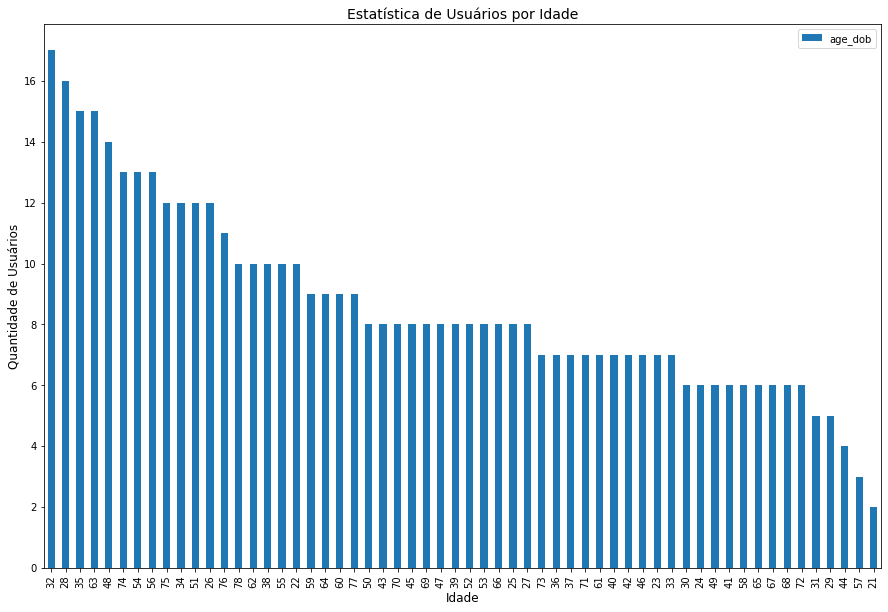

In [10]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

def PlotaGrafico(dfResult):
    # Analisando o percentual de usuários por gênero
    estatistica_genero = dfResult['gender'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

    # Analisando o percentual de usuários por país
    estatistica_pais = dfResult['country_location'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

    # Gravando dados do relatório no arquivo: "estatistica.txt"
    with open("Estatistica_de_Usuarios_por_Genero_e_Pais.txt", 'w') as relatorio:
        relatorio.write('\nEstatística de Usuários por Gênero (Percentual)\n')
        relatorio.write(str(estatistica_genero))
        relatorio.write('\n')

        relatorio.write('\nEstatística de Usuários por País (Percentual)\n')
        tam = len(estatistica_pais)
        relatorio.write(str(estatistica_pais))

        relatorio.close()

    # Analisando a estatística de usuários por idade
    estatistica_idade = dfResult['age_dob'].value_counts()

    # Plotando o Gráfico
    ax = estatistica_idade.plot(kind='bar', figsize=(15, 10), legend=True)
    ax.set_title("Estatística de Usuários por Idade", fontsize=14)
    ax.set_xlabel("Idade", fontsize=12)
    ax.set_ylabel("Quantidade de Usuários", fontsize=12)

    plt.savefig("Estatistica_de_Usuarios_por_Idade.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
# Teste da função para plotar gráficos
PlotaGrafico(GetApiRndUser(500))

# Etapa 4 Concluída com sucesso

# Etapa 5: Analisando dados com agrupamento 

Objetivo: utilizar técnicas de agrupamento para descobrir usuários que moram no mesmo país e estado.

Descrição da solução: uma função que recebe, como parâmetro, um pandas.DataFrame e retorna um pandas.DataFrame com as mesmas colunas, mas com os dados agrupados por país e estado.

Links úteis:
Documentação do Pandas: https://pandas.pydata.org/docs/

In [12]:
# Importando bibliotecas
import pandas as pd

def GroupByCountryState(dfResult):
    
    lstColunasIniciais = ['country_location', 'state_location']
    dfResult = dfResult.sort_values(lstColunasIniciais)
    lstColunas = list(dfResult.columns.values)
    lstColunas.remove('country_location')
    lstColunas.remove('state_location')
    lstColunasIniciais.extend(lstColunas)
    dfResult = dfResult[lstColunasIniciais]
    return dfResult
    
# Teste da função para plotar gráficos
display(GroupByCountryState(GetApiRndUser(500)))

# Etapa 5 Concluída com sucesso

,country_location,state_location,title_name,first_name,last_name,gender,date_dob,age_dob,city_location,phone,cell
20,Australia,Australian Capital Territory,Ms,Debbie,Carpenter,female,09/08/1948,74,Tweed,00-5610-0027,0436-315-065
84,Australia,Australian Capital Territory,Miss,Nevaeh,Owens,female,23/01/1955,68,Albury,08-0765-5021,0414-912-446
230,Australia,Australian Capital Territory,Mr,Sebastian,Davidson,male,14/03/1963,59,Dubbo,04-7328-6663,0405-791-679
278,Australia,Australian Capital Territory,Mrs,Marion,Mills,female,30/04/1992,30,Warrnambool,07-4043-7821,0483-459-739
240,Australia,New South Wales,Mr,Tyler,Oliver,male,08/04/1960,62,Tweed,08-2077-9024,0419-843-057
...,...,...,...,...,...,...,...,...,...,...,...
369,United States,Rhode Island,Mr,Henry,Prescott,male,24/10/1995,27,Midland,(845) 576-4119,(895) 876-2297
343,United States,Vermont,Ms,Grace,Phillips,female,11/09/1980,42,Pasadena,(562) 211-0780,(870) 443-8296
386,United States,Virginia,Mrs,Lois,Simpson,female,20/11/1969,53,Norfolk,(509) 850-9142,(514) 775-1202
313,United States,Wisconsin,Mr,Gabe,Washington,male,14/06/1978,44,Roanoke,(616) 913-7072,(728) 523-4347


# Etapa 6 (opcional): Particionando dados 

Objetivo: realizar o particionamento dos dados em formato Hive utilizando as informações de país e estado de cada usuário.

Descrição da solução: uma função que recebe, como parâmetro, um pandas.DataFrame e salva todos os dados em arquivos CSV particionados por país e estado.

Links úteis:
Documentação do Pandas: https://pandas.pydata.org/docs/
Documentação do Hive: https://hive.apache.org/
Documentação do BigQuery para dados particionados em Hive: https://cloud.google.com/bigquery/docs/hive-partitioned-queries-gcs

# Etapa 7: Parametrizando seu código ⚙️

Objetivo: nessa etapa, você deve parametrizar seu código para que ele seja executado com valores diversos fornecidos pelo usuário.

Descrição da solução: a solução dessa etapa consiste em uma função principal que recebe diversos parâmetros e executa as diversas etapas descritas anteriormente em função dos parâmetros fornecidos. Note que essa etapa é crucial para que seu código se torne reutilizável.

Dicas:
Tente pensar no maior número de parâmetros que sejam relevantes para sua pipeline de dados, sem afetar sua funcionalidade.
Colocar valores padrão para alguns desses parâmetros reduz o ônus do usuário de preenchê-los por conta própria.

In [44]:
import pandas as pd
from tqdm import tqdm

def ExecutaEtapas(etapa = '9', nreg = 10, inc = '', gender = '', nat = '', sep = '-', pos = 3):
    '''O que a função faz:
    Executa as diversas etapas descritas anteriormente em função dos parâmetros fornecidos. 
    
    Argumentos:
        etapa.: executa a etapa que corresposnde ao parâmetro informado. 
                pode ser informda mais de uma opção de etapa. Opções: 2, 3, 4, 5, 9.  
                2 executa a etapa 2... 9 executa todas as etapas. Padrão: 9
        nreg..: retorna n registros da API 'randomuser.me'. Padrão: 10
        inc...: retorna campos adicionais que são opcionais.
                Os campos padrão são: 'title_name', 'first_name', 'last_name', 'gender', 'date_dob', 
                'age_dob', 'country_location', 'state_location', 'city_location', 'phone', 'cell' 
        gender: filtra o gênero dos registros a serem trazidos da API. Opções: 'male' ou 'female'. 
                Padrão: ambos => 'male' e 'female'
        nat...: filtra o(s) código(s) do(s) país(es) da naturalidade. Opções: 
                Padrão: todos.
        sep...: é o tipo de separador a ser usado na formatação. Padrão: '-'
        pos...: é a posição em que entrará o separador a partir do final. Padrão: 3

        Obs...: a formatação usada pelos parâmetros 'sep' e 'pos' se dará do final para o início, se repetindo até o início
                Exemplo: print(FormataTexto('1234567890', '-', 3)) => retorna: 1-234-567-890 
    
    Retorna: True em caso de sucesso e False em caso de erro de execução da função '''

    sucesso = False
    
    if etapa == '9':
        lstEtapa = ['2', '3', '4', '5']
    else:        
        lstEtapa = etapa.split(',')
    
    QtdEtapa = len(lstEtapa)
    
    pbar = tqdm(total=QtdEtapa, position=0, leave=True)
    
    for procetapa in lstEtapa:
    
        if procetapa in ('2', '9'):
            print('Executando Etapa 2...')
            display(GetApiRndUser(nreg, inc, gender, nat))
            print('Fim da Etapa 2...\n')
            pbar.update()

        if procetapa in ('3', '9'):
            print('Executando Etapa 3...')
            display(FormtaTelefoneDf(GetApiRndUser(nreg, inc, gender, nat), sep, pos))
            print('Fim da Etapa 3...\n')
            pbar.update()

        if procetapa in ('4', '9'):
            print('Executando Etapa 4...')
            PlotaGrafico(GetApiRndUser(nreg, inc, gender, nat))
            print('Fim da Etapa 4...\n')
            pbar.update()

        if procetapa in ('5', '9'):
            print('Executando Etapa 5...')
            display(GroupByCountryState(GetApiRndUser(nreg, inc, gender, nat)))
            print('Fim da Etapa 5...\n')
            pbar.update()
        
    print('Processamento concluído')    
    sucesso = True
        
    return sucesso
    
# Teste da função para plotar gráficos
ExecutaEtapas('2', 100)

# Etapa 7 Concluída com sucesso

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Executando Etapa 2...


,title_name,first_name,last_name,gender,date_dob,age_dob,country_location,state_location,city_location,phone,cell
0,Mr,Warren,Martin,male,09/02/1996,27,Ireland,Cavan,Thurles,041-226-7545,081-486-1496
1,Ms,Amanda,da Cruz,female,30/10/1999,23,Brazil,Minas Gerais,Várzea Grande,(29) 4401-9462,(42) 7269-2616
2,Mrs,Wilfriede,Hörmann,female,03/10/1948,74,Germany,Rheinland-Pfalz,Breisgau-Hochschwarzwald,0322-2136116,0177-4327697
3,Mr,Harold,Carpenter,male,08/10/1977,45,United States,North Carolina,College Station,(612) 518-2751,(786) 804-3574
4,Mrs,Aayushi,Rajesh,female,06/04/1968,54,India,Puducherry,Machilipatnam,8742387477,7215862039
...,...,...,...,...,...,...,...,...,...,...,...
95,Mr,Albert,Simsek,male,31/03/2001,21,Netherlands,Limburg,Wijngaarden Zh,(000) 2368551,(06) 93534209
96,Miss,Debbie,Wade,female,25/06/1969,53,Australia,Victoria,Bowral,07-1478-3712,0484-523-723
97,Mr,Melvin,White,male,24/04/1979,43,Australia,Western Australia,Hobart,00-5536-8789,0404-620-560
98,Ms,Roswita,Gerling,female,10/11/1963,59,Germany,Thüringen,Wittingen,0661-9616056,0173-2515627


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.28s/it]

Fim da Etapa 2...

Processamento concluído


True